Helper link https://www.geeksforgeeks.org/python-play-a-video-using-opencv/?ref=lbp

# Loading librarys

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path, PureWindowsPath
from glob import glob

from PIL import Image
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *

# video file path

In [2]:
files = os.listdir('c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\VideoData')
# for i,j in enumerate(files):
#     print('{j} folder is lebel {i}'.format(i=i, j=j))

for i in files:
    print(i)

seg_comp1.mp4
seg_comp2.mp4


# Play a video using OpenCV

In [37]:
v = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\VideoData"
v

'C:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\VideoData'

In [11]:
## cv2.VideoCapture(0): Means first camera or webcam.
## cv2.VideoCapture(1):  Means second camera or webcam.
## cv2.VideoCapture(“file name.mp4”): Means video file

## Create a VideoCapture object and read from input file, different way to pass file path
# cap = cv2.VideoCapture('c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\\
# Dataset\\VideoData\\seg_comp1.mp4') 

# cap = cv2.VideoCapture(r'c:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\
# VideoData\seg_comp1.mp4')

# base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\VideoData"
# cap = cv2.VideoCapture(base_path + '\seg_comp1.mp4')

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4')

# Check if camera opened successfully 
if (cap.isOpened() == False): 
    print("Error opening video file") 

# Read until video is completed 
while(cap.isOpened()): 
      
# Capture frame-by-frame
    
    ret, frame = cap.read() 
    if ret == True: 
    # Display resulting frame 
        cv2.imshow('Frame', frame) 
          
    # Press Q on keyboard to exit 
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            break
  
# Break the loop 
    else: 
        break
# When everything done, release video capture object 
cap.release() 
  
# Closes all frames 
cv2.destroyAllWindows() 

# Create video using multiple images using OpenCV

In [49]:
# Folder which contains all the images from which video is to be generated

base_path = "c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1\\n01440764"
des_path = "c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\NewVideo"
# os.chdir("c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1\\n01440764")   

mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir(base_path + '.'))
print(num_of_images) 

for file in os.listdir(base_path + '.'): 
    im = Image.open(os.path.join(base_path, file)) 
    width, height = im.size 
    mean_width += width 
    mean_height += height 
    # im.show()   # uncomment this for displaying image 
  
# Finding mean height and width of all images as This is required because video frame needs 
# to be set with same width and height, Otherwise images not equal to that width height will not get embedded into video 
mean_width = int(mean_width / num_of_images) 
mean_height = int(mean_height / num_of_images) 
  
# print(mean_height) 
# print(mean_width) 
  
# Resizing of images to give them same width and height  
for file in os.listdir(base_path + '.'): 
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png") or file.endswith("JPEG"): 
        # opening image using PIL Image 
        im = Image.open(os.path.join(base_path, file))  
   
        # im.size includes height and width of image 
        width, height = im.size    
        print(width, height) 
  
        # resizing  
        # imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)
        imResize = im.resize((mean_width, mean_height))
        # imResize.save(file,'JPEG', quality = 95) # setting quality
        imResize.save(os.path.join(des_path, file),'JPEG', quality = 95) # setting quality and saving in new path
        # printing each resized image name 
        print(im.filename.split('\\')[-1], " is resized")  

# Video Generating function 
def generate_video(): 
    image_folder = des_path+'.' 
    video_name = 'mygeneratedvideo.avi'
    #os.chdir("C:\\Python\\Geekfolder2") 
      
    images = [img for img in os.listdir(image_folder) if img.endswith(".jpg") or img.endswith(".jpeg") or 
              img.endswith("JPEG") or img.endswith("png")] 
     
    # Array images should only consider image files ignoring others if any 
    print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting frame width, height of first image 
    height, width, layers = frame.shape   
  
    # video = cv2.VideoWriter(video_name, 0, 1, (width, height))
    video = cv2.VideoWriter(os.path.join(des_path, video_name), 0, 1, (width, height)) # saving to selected folder
  
    # Appending images to video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
      
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing video generated 
  
# Calling the generate_video function 
generate_video()

30
500 375
n01440764_105.JPEG  is resized
75 56
n01440764_107.JPEG  is resized
500 334
n01440764_137.JPEG  is resized
2048 1536
n01440764_141.JPEG  is resized
2304 1728
n01440764_148.JPEG  is resized
300 189
n01440764_172.JPEG  is resized
375 500
n01440764_18.JPEG  is resized
400 300
n01440764_188.JPEG  is resized
80 60
n01440764_190.JPEG  is resized
400 321
n01440764_192.JPEG  is resized
500 375
n01440764_200.JPEG  is resized
300 200
n01440764_237.JPEG  is resized
250 189
n01440764_239.JPEG  is resized
425 239
n01440764_261.JPEG  is resized
500 375
n01440764_292.JPEG  is resized
100 70
n01440764_297.JPEG  is resized
800 600
n01440764_298.JPEG  is resized
500 375
n01440764_315.JPEG  is resized
368 500
n01440764_320.JPEG  is resized
800 600
n01440764_334.JPEG  is resized
350 221
n01440764_341.JPEG  is resized
200 150
n01440764_36.JPEG  is resized
640 480
n01440764_37.JPEG  is resized
500 334
n01440764_39.JPEG  is resized
400 287
n01440764_44.JPEG  is resized
300 195
n01440764_63.JPEG  i

In [ ]:
# test work 

# Folder which contains all the images from which video is to be generated

# base_path = "c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1\\n01440764"
base_path = "c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\seg_image_all"
des_path = "c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\NewVideo"
# os.chdir("c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1\\n01440764")   

# mean_height = 0
# mean_width = 0
  
# num_of_images = len(os.listdir(base_path + '.'))
# print(num_of_images) 

# for file in os.listdir(base_path + '.'): 
#     im = Image.open(os.path.join(base_path, file)) 
#     width, height = im.size 
#     mean_width += width 
#     mean_height += height 
#     # im.show()   # uncomment this for displaying image 
  
## Finding mean height and width of all images as This is required because video frame needs 
## to be set with same width and height, Otherwise images not equal to that width height will not get embedded into video

# mean_width = int(mean_width / num_of_images) 
# mean_height = int(mean_height / num_of_images) 
  
# print(mean_height) 
# print(mean_width) 
  
## Resizing of images to give them same width and height  
# for file in os.listdir(base_path + '.'): 
#     if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png") or file.endswith("JPEG"): 
#         # opening image using PIL Image 
#         im = Image.open(os.path.join(base_path, file))  
   
#         # im.size includes height and width of image 
#         width, height = im.size    
#         #print(width, height) 
  
#         # resizing  
#         # imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)
#         imResize = im.resize((mean_width, mean_height))
#         # imResize.save(file,'JPEG', quality = 95) # setting quality
#         imResize.save(os.path.join(des_path, file),'JPEG', quality = 95) # setting quality and saving in new path
#         # printing each resized image name 
#         print(im.filename.split('\\')[-1], " is resized")  

# Video Generating function 
def generate_video(): 
    image_folder = base_path+'.' 
    video_name = 'mysegvideo.avi'
    #os.chdir("C:\\Python\\Geekfolder2") 
      
    images = [img for img in os.listdir(image_folder) if img.endswith(".jpg") or img.endswith(".jpeg") or 
              img.endswith("JPEG") or img.endswith("png")] 
     
    # Array images should only consider image files ignoring others if any 
    print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting frame width, height of first image 
    height, width, layers = frame.shape   
  
    # video = cv2.VideoWriter(video_name, 0, 1, (width, height))
    video = cv2.VideoWriter(os.path.join(des_path, video_name), 0, 1, (width, height)) # saving to selected folder
  
    # Appending images to video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
      
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing video generated 
  
# Calling the generate_video function 
generate_video()

# Extract images from video

help link: https://stackoverflow.com/questions/25359288/how-to-know-total-number-of-frame-in-a-file-with-cv2-in-python

In [58]:
# total number of Frame in a file with cv2 in python

def frame_count(video_path, manual=False):
    def manual_count(handler):
        frames = 0
        while True:
            status, frame = handler.read()
            if not status:
                break
            frames += 1
        return frames 

    cap = cv2.VideoCapture(video_path)
    # Slow, inefficient but 100% accurate method 
    if manual:
        frames = manual_count(cap)
    # Fast, efficient but inaccurate method
    else:
        try:
            frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        except:
            frames = manual_count(cap)
    cap.release()
    return frames

In [61]:
import timeit

vid_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\VideoData\seg_comp1.mp4"

print("fast method")
start = timeit.default_timer()
print('frames:', frame_count(vid_path, manual=False))
print(timeit.default_timer() - start, '(s)')

print("\nslow method")
start = timeit.default_timer()
print('frames:', frame_count(vid_path, manual=True))
print(timeit.default_timer() - start, '(s)')

fast method
frames: 1829
0.03213569999934407 (s)

slow method
frames: 1829
5.269488300000376 (s)


In [ ]:
### Extract images from video

# VideoCapture(File_path) : Read the video(.mp4 format)
# read() : Read data depending upon the type of object that calls
# imwrite(filename, img[, params]) : Saves an image to a specified file.

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cam = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 
  
try: 

    # creating a folder named seg_image
    if not os.path.exists(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image'): 
        os.makedirs(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of seg_image') 
  
# frame 
currentframe = 0
  
while(True): 
      
    # reading from frame 
    ret, frame = cam.read() 
    if ret: 
        # if video is still left continue creating images 
        name = base_path + '\seg_image\image' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        # writing the extracted images 
        cv2.imwrite(name, frame) 
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

In [55]:
name = base_path + '\seg_image\image' + str(currentframe) + '.jpg'
print ('Creating...' + name) 

Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image\image1829.jpg


In [15]:
base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cam = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 
  
try: 

    # creating a folder named seg_image
    if not os.path.exists(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all'): 
        os.makedirs(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of seg_image') 
  
# frame 
currentframe = 0
sgimage = 0

while(True): 
      
    # reading from frame 
    ret, frame = cam.read()

    #currentframe += 1
    if ret:
    #if currentframe%70 == 0: 
        # if video is still left continue creating images 
        # name = base_path + '\seg_image\image' + str(currentframe) + '.jpg'
        name = base_path + '\seg_image_all\image' + str(sgimage) + '.jpg'
        print('Creating...' + name) 
    
        # writing the extracted images 
        cv2.imwrite(name, frame) 
        print(frame.shape)
        sgimage +=1
        # increasing counter so that it will 
        # show how many frames are created
        
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image0.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image1.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image2.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image3.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image4.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image5.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image6.jpg
(720, 1280, 3)
Creating...C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image_all\image7.jpg

# Capture Video from Camera

In [18]:
# Steps to capture a video:
# Use cv2.VideoCapture() to get a video capture object for the camera.
# Set up an infinite while loop and use the read() method to read the frames using the above created object.
# Use cv2.imshow() method to show the frames in the video.
# Breaks the loop when the user clicks a specific key.

# define a video capture object 
vid = cv2.VideoCapture(0) 
  
while(True): 
      
    # Capture video frame by frame 
    ret, frame = vid.read() 
  
    # Display resulting frame 
    cv2.imshow('frame', frame) 
      
    # the 'q' button is set as quitting button, may use any desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

# Process images of a video using OpenCV

In [3]:
# Creating a VideoCapture object to read video
# Processing a video means, performing operations on the video frame by frame. Frames are nothing but just the particular instance of the video 
# in a single point of time. We may have multiple frames even in a single second. Frames can be treated as similar to an image.
# So, whatever operations we can perform on images can be performed on frames as well.

# By using this technique we can apply thresholding on small regions of the frame. So the collective value will be different for the whole frame. 

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 

# Loop until end of video
while (cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True: 
            frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
            
            # Display resulting frame
            cv2.imshow('Frame', frame)
            
            # conversion of BGR to grayscale is necessary to apply this operation
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # adaptive thresholding to use different threshold values on different regions of frame
            Thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                                   cv2.THRESH_BINARY_INV, 11, 2)
            
            cv2.imshow('Thresh', Thresh)
            # define q as exit button
            if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
    
    # Break the loop 
    else: 
        break
 
# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

In [4]:
# Smoothing a video means removing the sharpness of the video and providing a blurriness to the video. 
# There are various methods for smoothing such as cv2.Gaussianblur(), cv2.medianBlur(), cv2.bilateralFilter().

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 

while (cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True: 
            frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
            
            # Display resulting frame
            cv2.imshow('Frame', frame)
            
            # using cv2.Gaussianblur() method to blur the video
            # (5, 5) is the kernel size for blurring.
            gaussianblur = cv2.GaussianBlur(frame, (5, 5), 0) 
            cv2.imshow('gblur', gaussianblur)
            # define q as exit button
            if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
    
    # Break the loop 
    else: 
        break
 
# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

In [5]:
# Edge detection is a useful technique to detect the edges of surfaces and objects in the video. 
# Edge detection involves the following steps: 
# Noise reduction
# Gradient calculation
# Non-maximum suppression
# Double threshold
# Edge tracking by hysteresis

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 

while (cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True: 
            frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
            
            # Display resulting frame
            cv2.imshow('Frame', frame)
            
            # using cv2.Canny() for edge detection.
            edge_detect = cv2.Canny(frame, 100, 200)
            cv2.imshow('Edge detect', edge_detect)
            # define q as exit button
            if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
    
    # Break the loop 
    else: 
        break
# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

In [6]:
# Bitwise operations are useful to mask different frames of a video together. 
# Bitwise operations are just like AND, OR, NOT, XOR.

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 

while (cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True: 
            frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
            
            # Display resulting frame
            cv2.imshow('Frame', frame)
            
            # conversion of BGR to grayscale is necessary to apply this operation
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
         
            _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
         
            # apply NOT operation on image and mask generated by thresholding
            BIT = cv2.bitwise_not(frame, frame, mask = mask)
            cv2.imshow('BIT', BIT)
        
            # define q as exit button
            if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
    
    # Break the loop 
    else: 
        break
# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

# Writing to video with OpenCV

In [7]:
base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 

output = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*'MPEG'), 30, (1080, 1920))

while (cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True: 
            # adding rectangle on each frame 
            cv2.rectangle(frame, (100, 100), (500, 500), (0, 255, 0), 3) 
              
            # writing the new frame in output 
            output.write(frame) 
            cv2.imshow("output", frame) 
        
            # define q as exit button
            if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
    
    # Break the loop 
    else: 
        break
# release the video capture object
cap.release()
output.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

# Write text on video

In [9]:
# Syntax : cv2.putText(frame, Text, org, font, color, thickness)
# Parameters:
# frame: current running frame of the video.
# Text: The text string to be inserted.
# org: bottom-left corner of the text string
# font: the type of font to be used.
# color: the colour of the font.
# thickness: the thickness of the font

base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset"
cap = cv2.VideoCapture(base_path + '\VideoData\seg_comp1.mp4') 

# Check if camera opened successfully 
if (cap.isOpened() == False): 
    print("Error opening video file") 

# Read until video is completed 
while(cap.isOpened()): 
      
# Capture frame-by-frame
    
    ret, frame = cap.read() 
    if ret == True:
        font = cv2.FONT_HERSHEY_SIMPLEX 
  
        # Use putText() method for inserting text on video 
        cv2.putText(frame, 'TEXT ON VIDEO', (50, 50), font, 1, (0, 255, 255), 2, cv2.LINE_4) 
        # Display resulting frame 
        cv2.imshow('Frame', frame) 
          
        # Press Q on keyboard to exit 
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            break
  
# Break the loop 
    else: 
        break
# When everything done, release video capture object 
cap.release() 
# Closes all frames 
cv2.destroyAllWindows() 

# GIF/Video From Images With Python Pillow

In [108]:
# using pillow
from PIL import Image

# Open image file using Pillow 
img1 = Image.open(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image\image0.jpg') 
 
# Display the image 
# img1.show()  

# Get some information about image 
print(f"Image format: {img1.format}") 
print(f"Image size: {img1.size}") 

Image format: JPEG
Image size: (1280, 720)


In [83]:
base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image"

image_names = []
image_list = []

## by for loop
# for filename in sorted(glob.glob(base_path+ r'\*.jpg'), key=len):
#     image_names.append(filename)
#     im = Image.open(filename)
#     image_list.append(im)
# image_names[0:7]

## by list 
image_list = [Image.open(filename) for filename in sorted(glob(base_path+ r'\*.jpg'), key=len)] 

In [84]:
type(image_list[2])

PIL.JpegImagePlugin.JpegImageFile

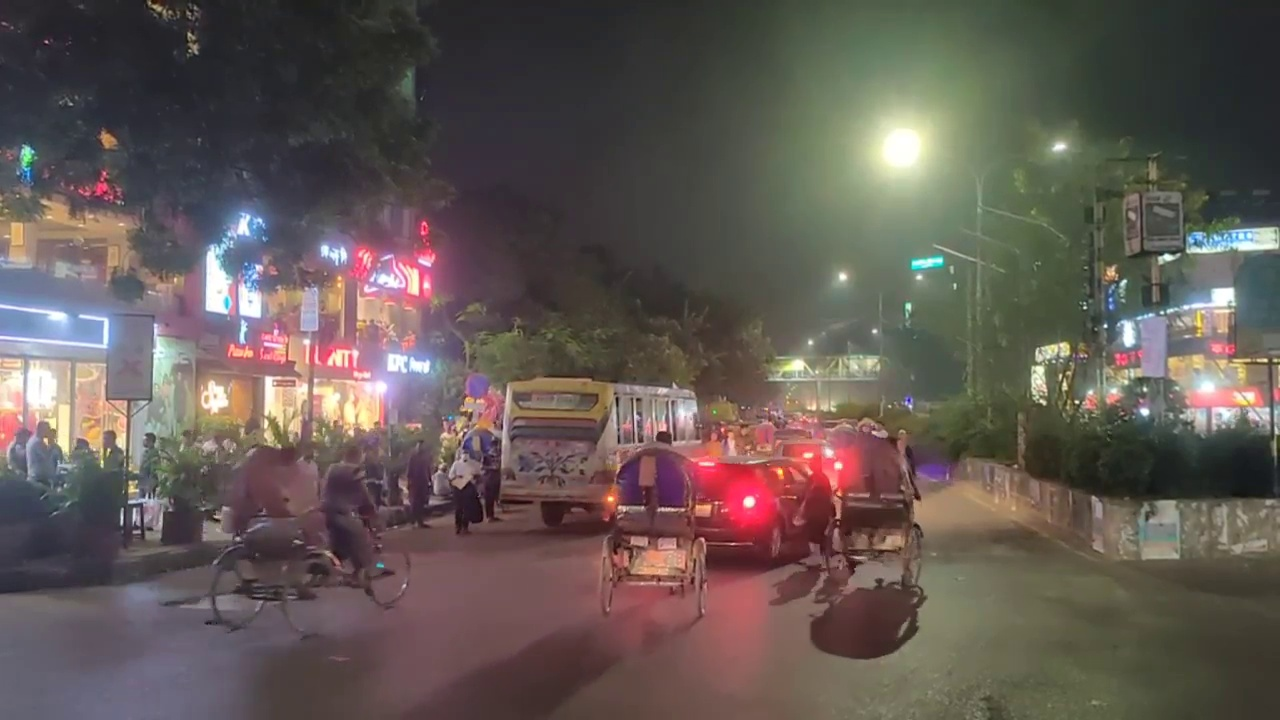

In [85]:
image_list[2]

In [103]:
print(type(image_list))
print(len(image_list))

<class 'list'>
54


https://pomain.medium.com/how-to-build-gif-video-from-images-with-python-pillow-opencv-c3126ce89ca8

https://stackoverflow.com/questions/4813061/non-alphanumeric-list-order-from-os-listdir

https://stackoverflow.com/questions/43232813/convert-opencv-image-format-to-pil-image-format

In [87]:
des_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\VideoData" 
gif = []

for image in image_list:
    gif.append(image)

# duration is the number of milliseconds between frames; this is frames per second, high duration means high length gif
# gif[0].save('n.gif', save_all=True, optimize=False, append_images=gif[1:], loop=0)
# gif[0].save('newx.gif', save_all=True, append_images=gif[1:])
gif[0].save(des_path+r'\new2.gif', save_all=True, duration=200, append_images=gif[1:])

# fast video from images

In [2]:
base_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image"
des_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\VideoData"  

def generate_gif():
    image_folder = base_path+'\.' 
    vid_name = des_path+'\my.avi'
          
    images = [img for img in sorted(os.listdir(image_folder), key=len) if img.endswith(".jpg") or img.endswith(".jpeg") or 
              img.endswith("JPEG") or img.endswith("png")] 
    
    # print(images) 
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    print(frame.shape)
    # setting frame width, height of first image 
    height, width, layers = frame.shape

    # video = cv2.VideoWriter('my.avi', cv2.VideoWriter_fourcc(*'XVID'), 24, (width, height))
    video = cv2.VideoWriter(vid_name, cv2.VideoWriter_fourcc(*'XVID'), 24, (width, height))
    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))  
      
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing video generated 
    
generate_gif()

(720, 1280, 3)


# To convert from OpenCV image to PIL image

(720, 1280, 3)
<class 'numpy.ndarray'>
(720, 1280, 3)


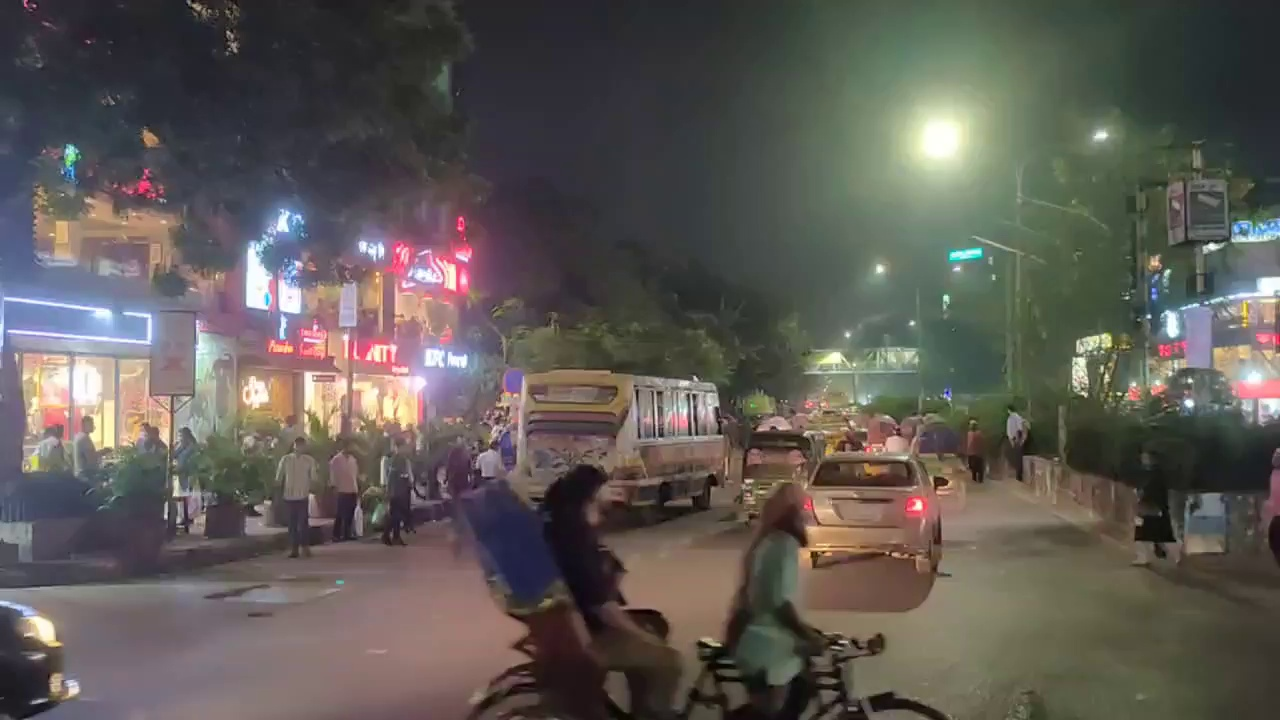

In [47]:
# open image using openCV2
opencv_image = cv2.imread(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image\image0.jpg')
print(opencv_image.shape)  # numpy.ndarray
print(type(opencv_image))

# convert from openCV2 to PIL. Notice the COLOR_BGR2RGB which means that color is converted from BGR to RGB
color_converted = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
print(color_converted.shape)  # numpy.ndarray

pil_image = Image.fromarray(color_converted)
pil_image

# np array to gif using pillow

In [7]:
total_rgb_mask = np.load(r"C:\Users\SHEHA\Downloads\t_rgb_mask.npy")
total_rgb_mask.shape

(54, 256, 256, 3)

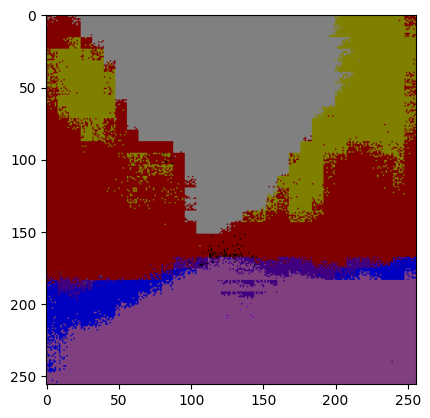

In [40]:
plt.imshow(total_rgb_mask[231]/255)

In [51]:
np.max(total_rgb_mask[231])

192.0

<class 'PIL.Image.Image'>


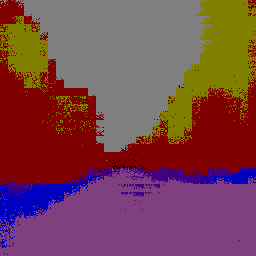

In [62]:
im = Image.fromarray(np.uint8(total_rgb_mask[231]))
print(type(im))
im

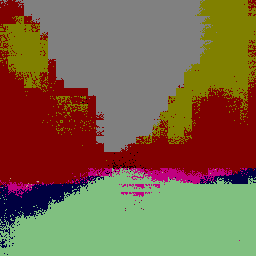

In [58]:
im = Image.fromarray(np.uint8(total_rgb_mask[231]*255))
im

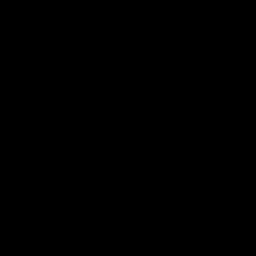

In [59]:
im = Image.fromarray(np.uint8(total_rgb_mask[231]/255))
im

https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

https://stackoverflow.com/questions/10965417/how-to-convert-a-numpy-array-to-pil-image-applying-matplotlib-colormap

https://stackoverflow.com/questions/63047707/how-do-i-convert-a-numpy-array-to-a-gif

In [8]:
# array to gif

des_path = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\VideoData" 

gif = [Image.fromarray(np.uint8(i)) for i in total_rgb_mask]
# for image in image_list:
#     gif.append(image)

# duration is the number of milliseconds between frames; this is frames per second, high duration means high length gif
# gif[0].save('n.gif', save_all=True, optimize=False, append_images=gif[1:], loop=0)
gif[0].save(des_path+r'\v150.gif', save_all=True, duration=150, append_images=gif[1:])

In [68]:
total_rgb_mask[231].shape

(256, 256, 3)

In [76]:
for i in total_rgb_mask:
    print(i.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 